**WHAT IS THE MOST EXPANSIVE NEIGHBOURHOOD OF RIO DE JANEIRO?**

On this Notebook i remove the outliers listings 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data set
df = pd.read_csv('C:/Users/zanin/OneDrive/Área de Trabalho/airbnbrj/listingsrj.csv')

In [2]:
# remove money ($) sign and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].fillna(df['price'].median(), inplace = True)

In [3]:
# removing outliers in price to better analize and visualize the data.
cols = ['price'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
neighbourhoods = df.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()

neighbourhoods.head(10).sort_values(by= 'price', ascending=False)

,neighbourhood_cleansed,price
3,Anchieta,800.000000
8,Barra da Tijuca,456.024708
2,Alto da Boa Vista,445.333333
9,Barra de Guaratiba,400.075000
7,Bangu,337.500000
0,Abolição,316.000000
5,Anil,278.095238
1,Acari,250.000000
4,Andaraí,248.375000
6,Bancários,210.600000


<AxesSubplot: xlabel='price', ylabel='neighbourhood_cleansed'>

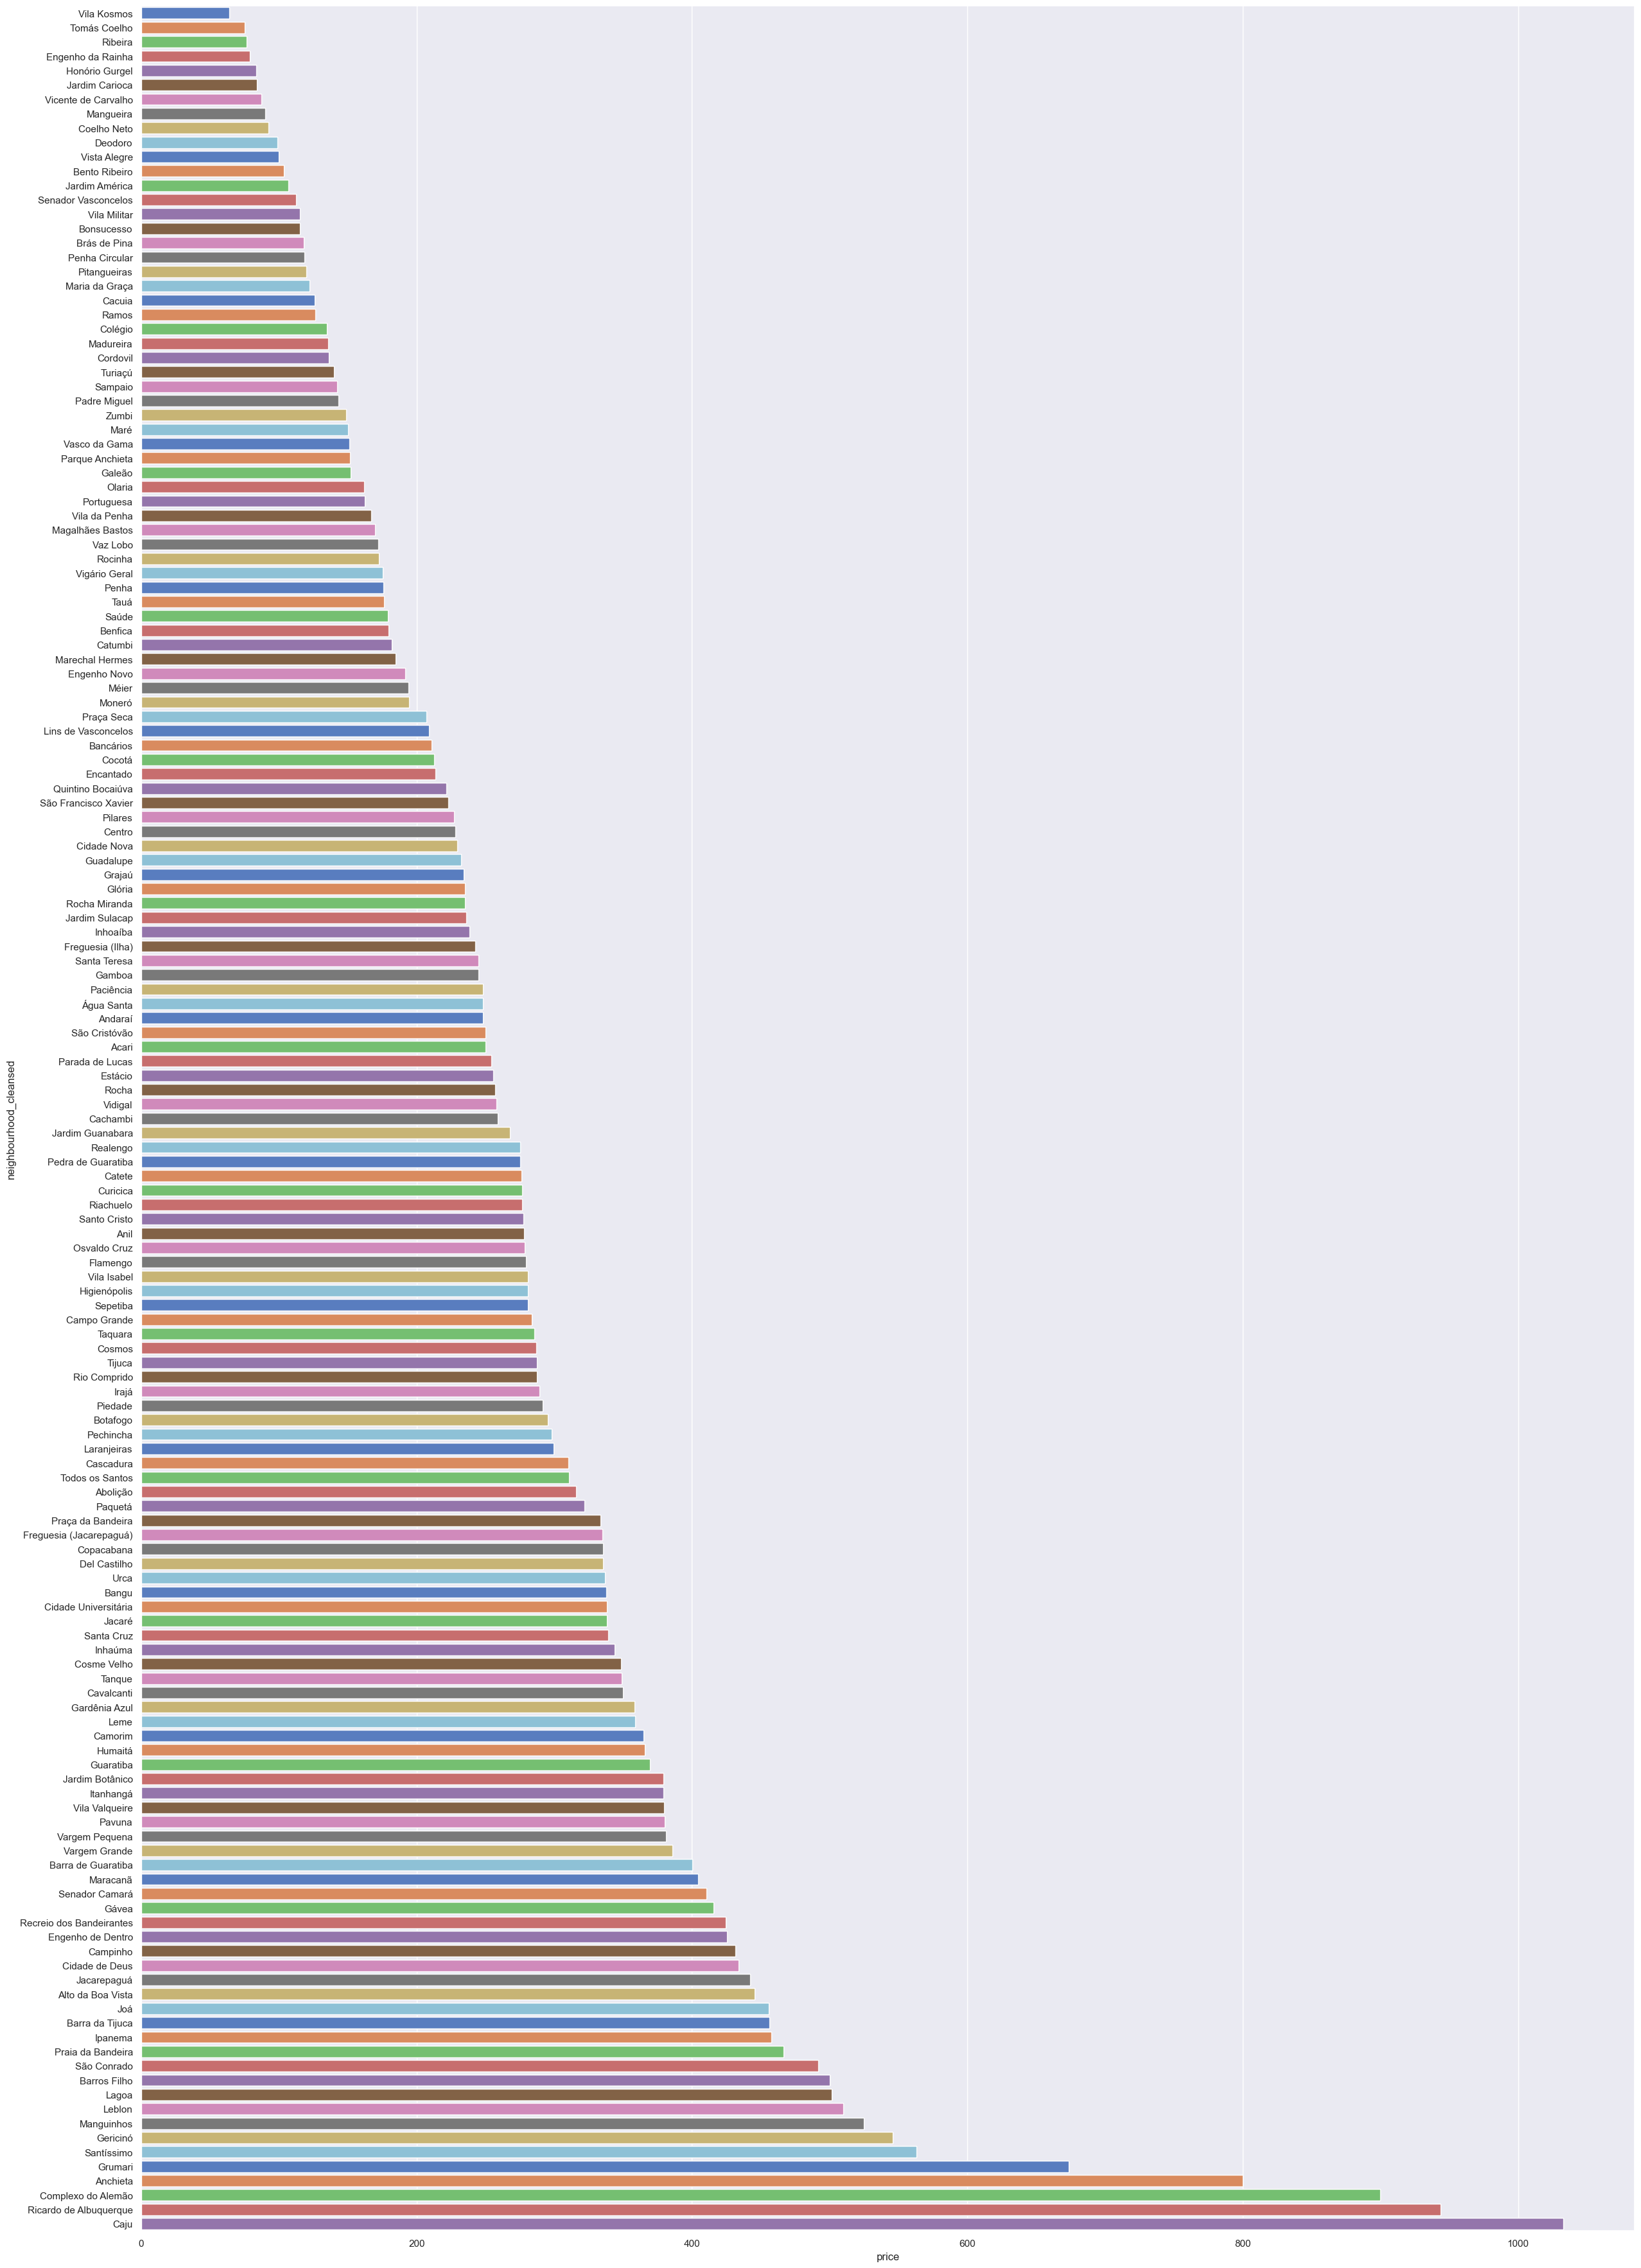

In [5]:
sns.set(rc={'figure.figsize':(30,45)})
# Neighbourhoods
neighbourhoods = df.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()
sns.barplot(
    x='price', y='neighbourhood_cleansed',
    data=neighbourhoods.sort_values('price'),
    orient='h',
    palette='muted'
)